In [98]:
import pandas as pd
# import matplotlib.pyplot as plt

data = pd.read_csv("../Analysis_Data/sorted_data.csv")
data

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,10,Beko,49.0,M,0.0
1,7,Beko,38.0,M,0.5
2,9,Beko,52.0,M,1.0
3,5,Beko,41.0,M,1.0
4,7,Beko,37.0,M,1.0
...,...,...,...,...,...
453,8,Tefal,22.0,K,5.0
454,7,Tefal,27.0,M,5.0
455,8,Tefal,23.0,M,5.0
456,9,Tefal,42.0,M,5.0


data - variable of analysed data

Text(0.5, 0, 'company')

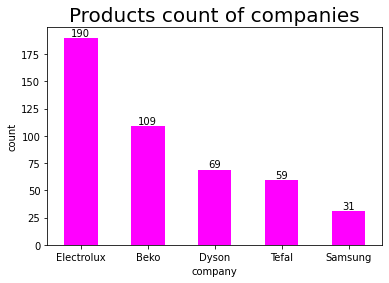

In [99]:
companies_count = data.Marka.value_counts()
ax = companies_count.plot.bar(color='magenta', rot=0)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Products count of companies', fontsize=20)
ax.set_ylabel('count')
ax.set_xlabel('company')

companies_count - it shows how many hoovers are sold by each company, We can see that the most popular company is Electrolux and the least is Samsung.

C:\Users\szyme\AppData\Local\Temp/ipykernel_708/236535906.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  companies_ratio = data.groupby('Marka').mean().drop('Dni od zakupu', axis=1)


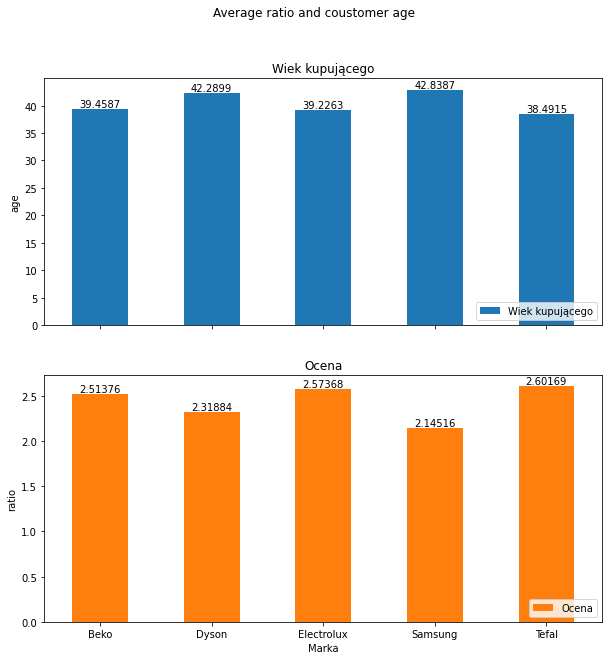

In [100]:
companies_ratio = data.groupby('Marka').mean().drop('Dni od zakupu', axis=1)
ax = companies_ratio.plot.bar(subplots=True, rot=0, title='Average ratio and coustomer age', figsize=(10,10))
ax[0].legend(loc=4)
ax[1].legend(loc=4)
ax[0].set_ylabel('age')
ax[1].set_ylabel('ratio')
for container in ax[0].containers:
    ax[0].bar_label(container)
for container in ax[1].containers:
    ax[1].bar_label(container)

There is no colleration between average ratio and mean age of customer in companes.

In [101]:
data.value_counts('Płeć kupującego')

Płeć kupującego
M    396
K     62
dtype: int64

In [102]:
print(data.value_counts('Płeć kupującego')[0]/data.value_counts('Płeć kupującego')[1])

6.387096774193548


Males buy vaccum cleaner more than 6 times often than females.

Table that include Companies and ratio of them products:

In [103]:
pd.crosstab(index=data.Ocena, columns=data.Marka)

Marka,Beko,Dyson,Electrolux,Samsung,Tefal
Ocena,,,,,
0.0,1,2,0,0,1
0.5,1,1,5,0,1
1.0,10,8,15,5,6
1.5,14,9,29,7,10
2.0,18,15,33,7,10
2.5,20,9,37,5,5
3.0,21,10,22,3,6
3.5,9,10,16,3,9
4.0,12,4,14,0,4


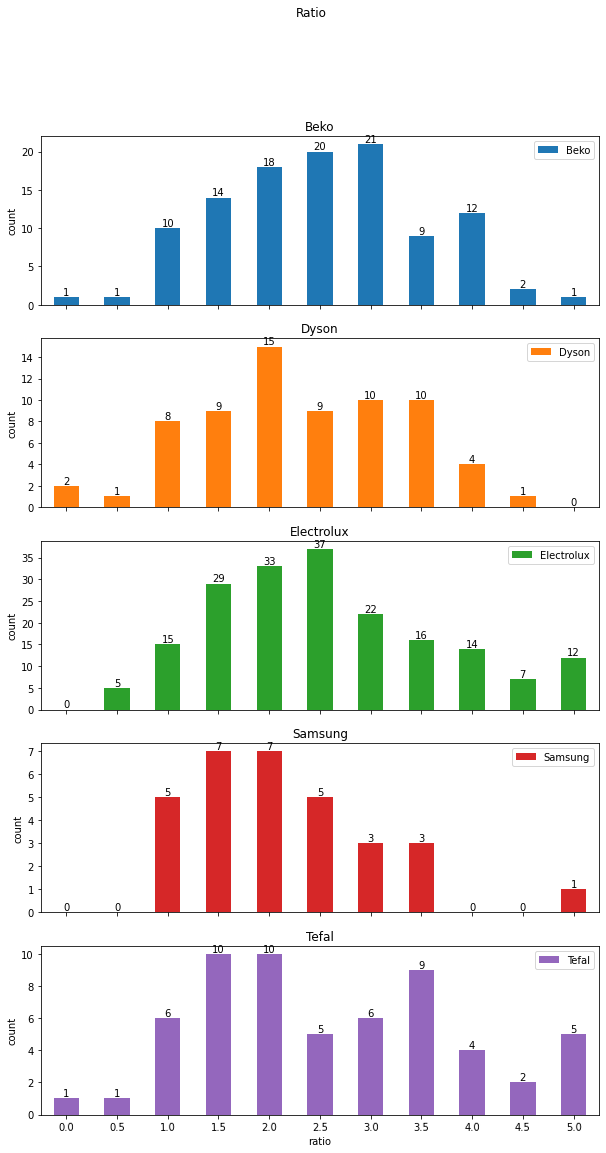

In [104]:
stats = pd.crosstab(index=data.Ocena, columns=data.Marka)
ax = stats.plot.bar(subplots=True, figsize = (10,18), title='Ratio', xlabel='ratio', ylabel='count', rot=1)
lst=[]
for container in ax[0].containers:
    ax[0].bar_label(container)
for container in ax[1].containers:
    ax[1].bar_label(container)
for container in ax[2].containers:
    ax[2].bar_label(container)
for container in ax[3].containers:
    ax[3].bar_label(container)
for container in ax[4].containers:
    ax[4].bar_label(container)

Text(0.5, 0, 'Time after bought')

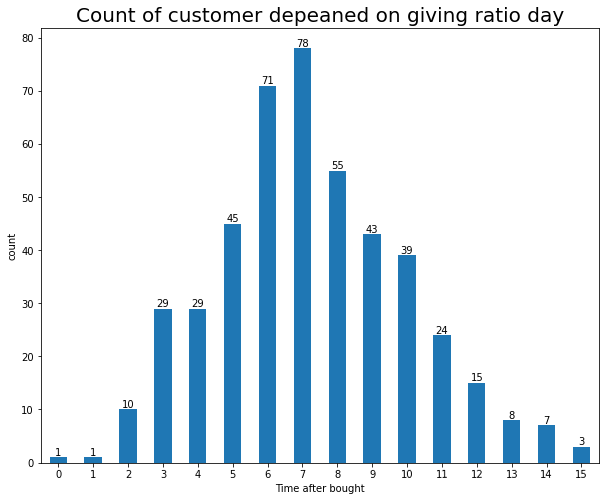

In [105]:
time_after_bought = data.drop(['Marka', 'Wiek kupującego', 'Ocena', 'Płeć kupującego'], axis=1).groupby("Dni od zakupu").value_counts()
ax = time_after_bought.plot.bar(figsize=(10,8), rot=1)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Count of customer depeaned on giving ratio day', fontsize=20)
ax.set_ylabel('count')
ax.set_xlabel('Time after bought')

time_after_bought - shows that how long it takes to customer to post a ratio after bought of product

Text(0.5, 0, 'age')

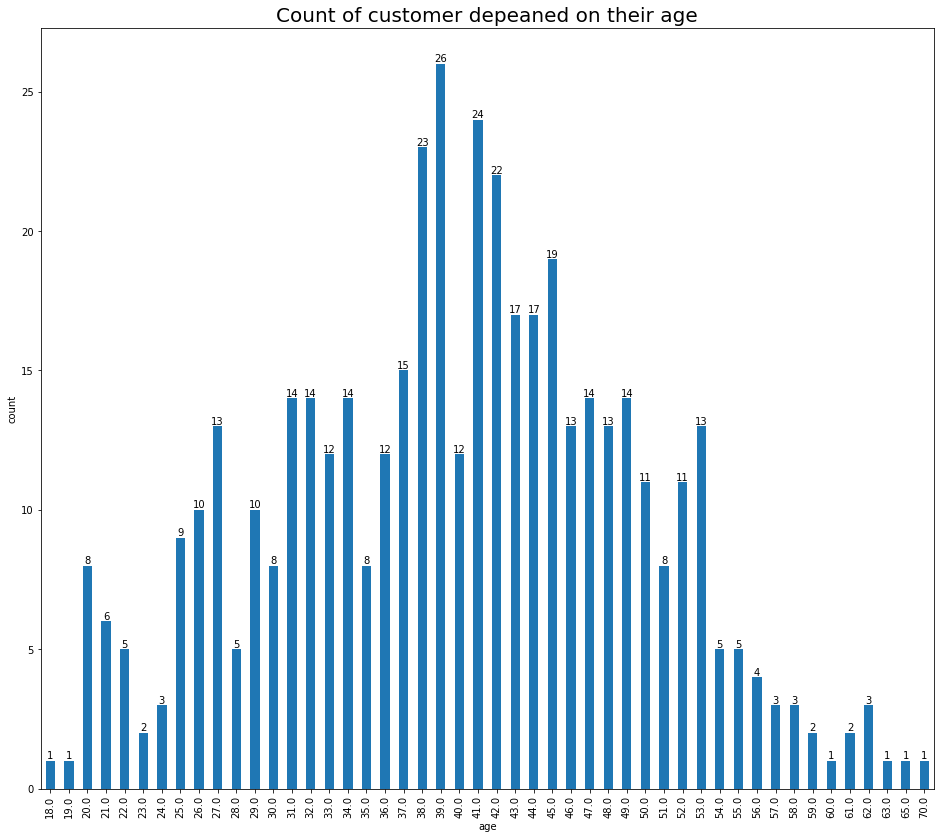

In [106]:
age = data.drop(['Marka', 'Ocena', 'Dni od zakupu', 'Płeć kupującego'], axis=1).groupby("Wiek kupującego").value_counts()
ax = age.plot.bar(title='Count of customer age', figsize=(16,14))
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Count of customer depeaned on their age', fontsize=20)
ax.set_ylabel('count')
ax.set_xlabel('age')

age - count customers at the same age